**Part 3 - Mapping Closure in 2D for f_BZ using the IEM**

This notebook implements the interaction by exchange with the mean model (IEM) as introduced by (Dopazo, C. & O'Brien, E. 1974) and discussed by (Pope, S.B. 2010), in order to obtain a closure for the buoyancy equation

\begin{equation}
\frac{\partial B}{\partial t} + \left( \boldsymbol{U} \cdot \nabla \right) B = \alpha \nabla^2 B.
\end{equation}

We model the time evolution of the PDF $f_{\boldsymbol{Y}}$ for $\boldsymbol{Y} = (B,Z)$.


*Evolution equation*

The joint pdf $f_{\boldsymbol{Y}}$ evolves according to 

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} = - \frac{\partial }{\partial z} \mathbb{E}_{\boldsymbol{Y}}[W] f_{\boldsymbol{Y}} - \alpha \frac{\partial^2 }{\partial b^2} \left( \mathbb{E}_{\boldsymbol{Y}}[ |\nabla B|^2] f_{\boldsymbol{Y}} \right) + \alpha \frac{\partial^2 }{\partial z^2} f_{\boldsymbol{Y}}.
\end{equation}

or

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} = - \frac{\partial }{\partial z} \mathbb{E}_{\boldsymbol{Y}}[W] f_{\boldsymbol{Y}} - \frac{\partial }{\partial b} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha \nabla^2 B ] f_{\boldsymbol{Y}} \right),
\end{equation}


where $\mathbb{E}_{\boldsymbol{Y}}[W]$ is responsible for meso-scale mixing by moving $f_{\boldsymbol{Y}}$ in real space and $\mathbb{E}_{\boldsymbol{Y}}[\alpha  |\nabla B|^2 ]$ ( or $\mathbb{E}_{\boldsymbol{Y}}[\alpha \nabla^2 B ]$) is responsible for micro-scale molecular mixing locally in composition space.

*Velocity closure*

For the vertical velocity we will use a gradient diffusion model
\begin{equation}
\mathbb{E}_{\boldsymbol{Y}}[W] f_{BZ} = - \alpha_T \frac{\partial f_{BZ}}{\partial z}, 
\end{equation}
where the turbulent diffusivity $\alpha_T(z,t)$ which must be modelled.

*Molecular mixing closure*

For the conditional diffusion term we will employ the IEM model. However, to expose the contribution of the forcing at the top and bottom boundaries we write the molecular diffusion term in terms of its horizontal $\nabla_H$ and vertical $\nabla_Z$ components as 

\begin{equation}
\mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla B|^2 ] = \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla_H B|^2 ]+ \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla B_Z|^2].
\end{equation}

Assuming statistically homogeneous horizontal slices, we apply the IEM model to horizontal slices

\begin{equation}
  \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla_H B|^2 ] f_{\boldsymbol{Y}} = -\frac{\alpha}{\tau_{B}(t)} \int \left( b - \mathbb{E}_Z[B] \right) f_{\boldsymbol{Y}} \, db,
\end{equation}

where $\tau_B(t)$ defines a characteristic time-scale of the buoyancy fluctuations. For the vertical gradient however we need a further assumption. Opting to relate the horizontal and vertical gradients via the parameter $\lambda(z)$ which characterises the ratio of the vertical and horizontal Taylor microscales we can write

\begin{equation}
  \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla B|^2 ] f_{\boldsymbol{Y}} = -\frac{\alpha(1 + \lambda)}{\tau_{B}(t)} \int \left( b - \mathbb{E}_Z[B] \right) f_{\boldsymbol{Y}} \, db.
\end{equation}

*Closed evolution equation*

Substituting the closures for the unknown terms we obtain

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} = \underbrace{\frac{\alpha( 1 + \lambda(z))}{\tau_{B}(t)} \frac{\partial }{\partial b} \left[ \left( b - \mathbb{E}_Z[B_t] \right) f_{\boldsymbol{Y}} \right]}_{M} +  \underbrace{\frac{\partial }{\partial z} \left( ( \alpha + \alpha_T(z,t) )  \frac{\partial  f_{\boldsymbol{Y}} }{\partial z} \right)}_{D}.
\end{equation}

which is an integro-differential equation, as

\begin{equation}
\mathbb{E}_Z[B_t] = \int b f_{B|Z}(b|z;t) db = \int b \frac{f_{BZ}(b|z;t)}{f_Z(z)} db.
\end{equation}

depends on the PDF at each time-instant. Subject to specifying $\lambda, \tau_B, \alpha_T$ and suitable boundary conditions this equation is closed and can be solved numerically.

*Numerical formulation*

Following (Pope, S.B. 1981) and (Pope, S.B. 1985) we employ a finite-difference scheme in time/physical space $(z,t)$ and a Monte-Carlo approach in probability space $b$ such that $f_{i}^n = f_{\boldsymbol{Y}}(b;z_i,t^n)$, where $z_i$ is a node on the spatial grid and $t^n$ a discrete time instant. At each time-instant $t^n$ the density is represented at every node $z_i$ by an ensemble of $N_b$ particles so that if we have $N_z$ nodes this translates to $N_b N_z$ particles

\begin{align*}
\Phi_{N_z}^n &= \{\psi_{N_z,1}^n, \psi_{N_z,2}^n, \cdots, \psi_{N_z,N_b}^n\}, \\
\vdots  \;   &= \quad \quad \quad \vdots, \\
\Phi_{2}^n   &= \{\psi_{2,1}^n, \psi_{2,2}^n, \cdots, \psi_{2,N_b}^n\}, \\
\Phi_{1}^n   &= \{\psi_{1,1}^n, \psi_{1,2}^n, \cdots, \psi_{1,N_b}^n\},
\end{align*}

the method works by specifying how to move elements between these ensembles. Discretising the time derivative with a first order Euler-Scheme

\begin{equation}
f_i^{n+1} = \left(I + \Delta t M + \Delta t D \right) f_i^n + \mathcal{O}(\Delta t),
\end{equation}

which to $\mathcal{O}(\Delta t^2)$ can be written as the product 

\begin{equation}
f_i^{n+1} = (I + \Delta t M) (I + \Delta t D) f_i^n + \mathcal{O}(\Delta t^2).
\end{equation}

To time-integrate the system forward we then split the system up into two stages

\begin{align}
f^D     &= (I + \Delta t D) f^n, \\
f^{n+1} &= (I + \Delta t M) f^D.
\end{align}

*Diffusion*

The diffusion operator is defined by its central difference approximation

\begin{equation}
    f^D \approxeq \left(I + \Delta t D_{i,j} \right) f_j^n = f_i^n +  \frac{\Delta t}{\Delta z ^2} \left( \alpha_T(z_{i+1/2}, t^n) [f_{i+1}^n - f_i^n] - \alpha_T(z_{i - 1/2}, t^n) [f_{i}^n - f_{i-1}^n] \right).
\end{equation}

but as we use particles rather than the density, we must translate this operation into rules for moving particles between the ensembles $\Phi_i^n$ at each node. Multiplying the finite difference approximation by $Q(b)$ and taking its expectation we obtain

\begin{align*}
    q^D \approxeq \left(I + \Delta t D_{i,j} \right) q_j^n &= q_i^n +  \frac{\Delta t}{\Delta z ^2} \left( \alpha_T(z_{i+1/2}, t^n) [q_{i+1}^n - q_i^n] - \alpha_T(z_{i - 1/2}, t^n) [q_{i}^n - q_{i-1}^n] \right), \\
                                                           &= (1-\gamma_+ -\gamma_-) q_i^n + \gamma_+ q_{i+1}^n + \gamma_- q_{i-1}^n,
\end{align*}

where $\gamma_{\pm} = \frac{\Delta t}{\Delta z^2} \alpha_T(z_{i \pm 1/2}, t^n)$. To determine the new ensemble $\Phi_i^D$ corresponding to $f_i^D$ located at the node $z_i$ we form the new set of elements  

\begin{equation}
    \Phi_i^D = \{  \underbrace{\Phi_{i+1}^{n}}_{ N_b \gamma_+} , \underbrace{\Phi_{i}^{n}}_{ N_b ( 1 - \gamma_+ - \gamma_-)}  , \underbrace{\Phi_{i-1}^{n}}_{N_b \gamma_-} \},
\end{equation}

from subsets of size $N_b \gamma_+$, $N_b ( 1 - \gamma_+ - \gamma_-)$ and $N_b \gamma_-$ randomly sampled from $\Phi_{i+1}^{n}, \Phi_{i}^{n}$ and $\Phi_{i-1}^{n}$ respectively.

*Mixing*

The mixing operation at $z = z_i$ for all elements in the ensemble $\Phi_i^D$, used to update for $\Phi_i^{n+1}$ is then given by

\begin{equation}
    \tilde{b}^{n+1}_{i,p} = \tilde{b}^n_{i,p} - \Delta t  \left( \tilde{b}_p - \mathbb{E}[B_{t^n}|Z=z_i] \right) \frac{\alpha( 1 + \lambda(z_i))}{\tau_{B}(t^n)},
\end{equation}

which when binned in turn yields the distribution $f_i^{n+1}$ at the next time-step. 


*Boundary conditions*

We implement this equation with boundary conditions given by the joint pdf as
\begin{equation}
f_{B|Z=z_i} = \frac{1}{\Sigma \sqrt{2 \pi} } \exp\left( -\frac{1}{2} \left( \frac{b - \mu_i}{\Sigma} \right)^2 \right)
\end{equation}
with $\mu_0 = 1$ and the bottom boundary ($z=0$) and $\mu_0=-1$ and the top boundary ($z=1$) and $\Sigma = 1/2$. This corresponds to the maintaining the contents of the ensembles $\Phi_0$, $\Phi_{N_z}$ throughout the simulation.

**Setup**

We first import the required libraries to implement this model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We then define a computation grid for $f_{B}(b,z;t)$ in terms of $b,z$. When defining the $f^n_B(b,z) = f_B(b,z,t=t_n)$ we use 2 dimensional arrays where axis 0 is $b$ and the axis 1 is $z$.

In [2]:
# Parameters
τ = 1
λ = 10
α = 1
α_T = 1

# Numerical resolution
N_z = 32

# Particles 
N_b = 10**3

# Domain
z, Δz = np.linspace(0,  1,     N_z, retstep=True) 
t, Δt = np.linspace(0, 1, 5*10**3, retstep=True)

# Boundary conditions
b_0 = np.random.normal(loc= 1, scale=.1, size=N_b)
b_1 = np.random.normal(loc=-1, scale=.1, size=N_b)

# Initial condition
X   = np.zeros((N_z, N_b))
for i in range(N_z):
    if i == 0:
        X[i,:] = b_0
    elif i == N_z-1:
        X[i,:] = b_1
    else:
        X[i,:] = 0.0 #np.random.normal(loc=0, scale=1/2, size=N_b)
        #X[i,:] = np.random.uniform(min(b), max(b), N_b)

# Diffusion coefficient
γ_p = (α + α_T)*( Δt / (Δz**2) )
γ_m = (α + α_T)*( Δt / (Δz**2) )

# Check time-step restriction for stability
if γ_m > 0.5:
    print('Warning: γ_m > 0.5')
    print('γ_m =', γ_m)
if γ_p > 0.5:
    print('Warning: γ_p > 0.5')
    print('γ_p =', γ_p)

# Check time-step restriction for particles
if ( int(N_b*γ_p) + int(N_b*γ_m) ) >= N_b:
    print('Warning: time-step restriction for particles')
    print('n_m =', int(N_b*γ_m))
    print('n_p =', int(N_b*γ_p))
    print('n_c =', N_b - int(N_b*γ_p) - int(N_b*γ_m))

*Diffusion operator*

We define the action of the diffusion operator on the ensemble below

In [3]:
def diffusion(X, N_b, N_z, γ_p, γ_m):
    """
    Simulates the diffusion process by redistributing particles between neighboring ensembles.

    Parameters:
    -----------
    X : ndarray
        A 2D array of shape (N_z, N_b) representing the particle ensembles at each spatial node.
    N_b : int
        The number of particles in each ensemble.
    N_z : int
        The number of spatial nodes.
    γ_p : float
        The fraction of particles moving to the next spatial node (positive direction).
    γ_m : float
        The fraction of particles moving to the previous spatial node (negative direction).

    Returns:
    --------
    X_new : ndarray
        A 2D array of shape (N_z, N_b) representing the updated particle ensembles after diffusion.
    """
    n_p = int(N_b * γ_p)
    n_m = int(N_b * γ_m)
    n_c = N_b - n_p - n_m

    # Preallocate the new array
    X_new = np.zeros_like(X)

    # Handle interior nodes
    for i in range(1, N_z - 1):
        X_p = np.random.choice(X[i + 1, :], size=n_p, replace=False)
        X_c = np.random.choice(X[i, :],     size=n_c, replace=False)
        X_m = np.random.choice(X[i - 1, :], size=n_m, replace=False)
        X_new[i, :] = np.concatenate((X_p, X_c, X_m))

    # Handle boundary nodes (no diffusion)
    X_new[ 0, :] = X[0, :]
    X_new[-1, :] = X[-1, :]

    return X_new

We then define the mixing operation

In [4]:
def mixing(X, N_z, Δt):
    """
    Simulates the mixing process by adjusting particle values in each ensemble 
    based on the mean value of the ensemble and the mixing parameters.

    Parameters:
    -----------
    X : ndarray
        A 2D array of shape (N_z, N_b) representing the particle ensembles at each spatial node.
    N_z : int
        The number of spatial nodes.
    Δt : float
        The time step size.

    Returns:
    --------
    X_new : ndarray
        A 2D array of shape (N_z, N_b) representing the updated particle ensembles after mixing.
    """
    # Preallocate the new array
    X_new = np.zeros_like(X)

    # Handle interior nodes
    for i in range(1, N_z - 1):
        X_new[i,:] = X[i,:] - Δt*(X[i,:] - np.mean(X[i,:]))*α*( (1 + λ)/τ )

    # Handle boundary nodes (no mixing)
    X_new[0 , :] = X[0, :]
    X_new[-1, :] = X[-1, :]

    return X_new

We then write helper functions to recover the density from the mapping and to enforce the boundary conditions.

In [5]:
def density(X, N_z, z, N_bins=64):

  b_min = min(X.flatten())
  b_max = max(X.flatten())
  # Marginal density
  fB, b_edges = np.histogram(X.flatten(), bins=N_bins, range=(b_min,b_max), density=True)
  b = 0.5*(b_edges[1:] + b_edges[:-1])
  
  # Joint density
  fBZ = np.zeros((N_z, len(b)))
  for i in range(N_z):
    fBZ[i,:] = np.histogram(X[i,:], bins=N_bins, range=(b_min,b_max), density=True)[0]

  return fBZ, fB, b, z, b_edges


def solver(Φ, N_b, N_z,  γ_p, γ_m, T, Δt, z):

  #f_frames = []
  #f_frames.append(f)

  # Loop over all time instants
  for n,t in enumerate(T):
  
    # 0) Plot the system out
    if n%(len(T)//10) == 0:
      print('t = %3.3f \n' % t)
      
      fBZ, fB, b, z, b_edges = density(Φ, N_z, z)

      fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, layout='constrained')
      ax1.set_title(r'$f_{BZ}$')
      
      cf = ax1.pcolormesh(b, z, fBZ, cmap='Reds')#, norm='log')
      fig.colorbar(cf, ax=ax1)

      ax1.set_ylabel('$z$')
      ax1.set_xlabel('$b$')

      ax2.set_ylabel('$f_B(b)$')
      ax2.set_xlabel('$b$')
      #ax2.plot(b, fB)
      ax2.stairs(fB, b_edges)
      plt.show()

    # 1) Update the ensemble
    Φ_D = diffusion(Φ, N_b, N_z, γ_p, γ_m)
    Φ   = mixing(Φ_D, N_z, Δt)

    # 2) Grab the system state
    #f_frames.append(f)

  return None

Finally we then time-step the system. The error in the numerical approximation is $\mathcal{O}(\Delta t (\Delta z^2))$ in space and time due to the finite difference discretisation, while it is $\mathcal{O}(N_b^{-1/2})$ due to the Monte-Carlo approach.

t = 0.000 



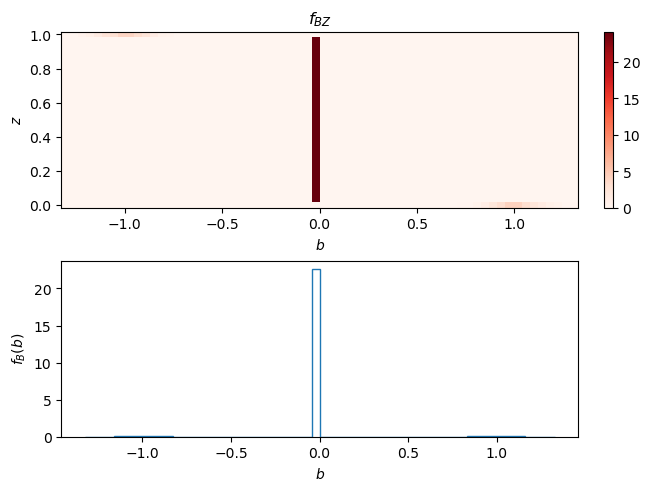

t = 0.100 



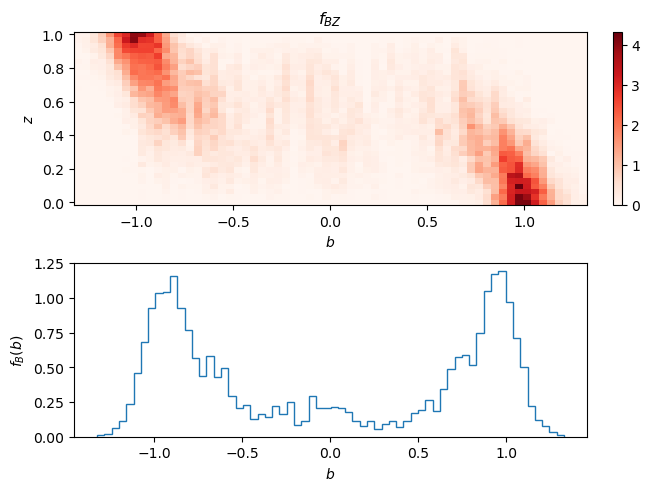

t = 0.200 



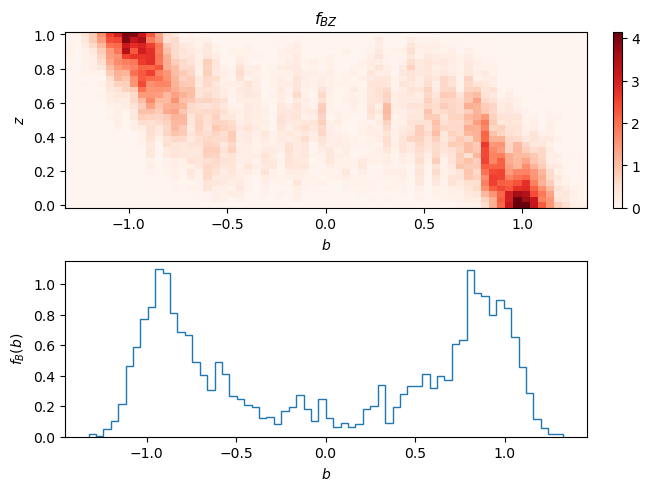

t = 0.300 



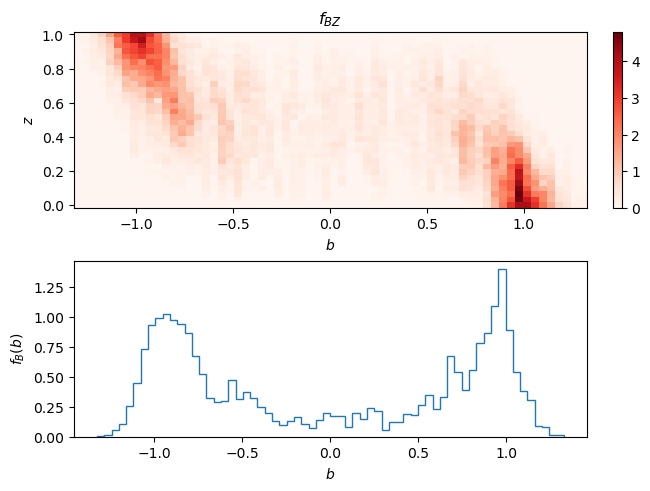

t = 0.400 



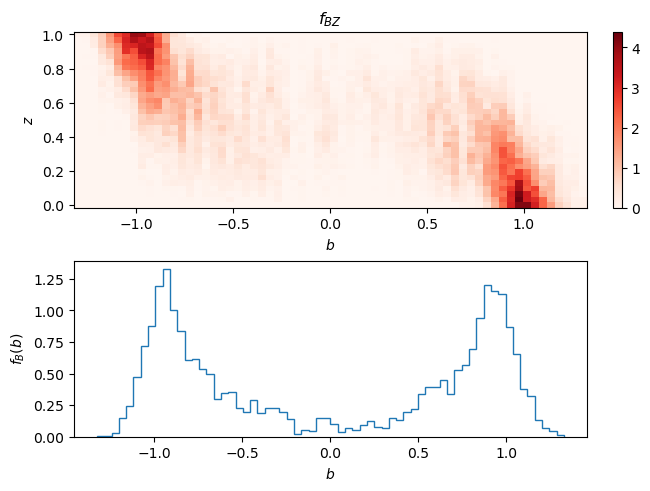

t = 0.500 



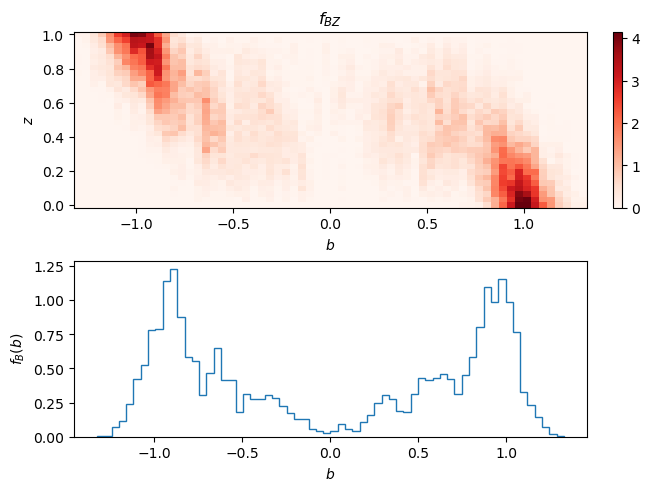

t = 0.600 



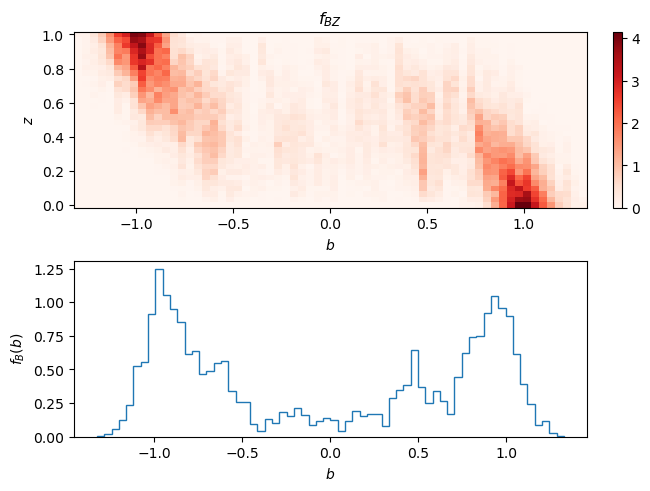

t = 0.700 



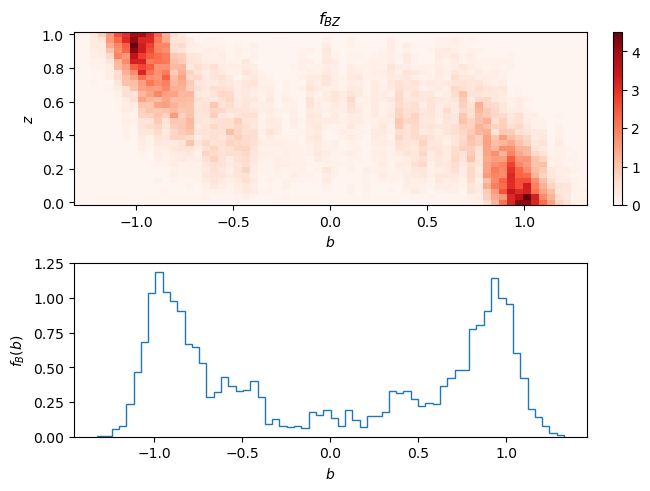

t = 0.800 



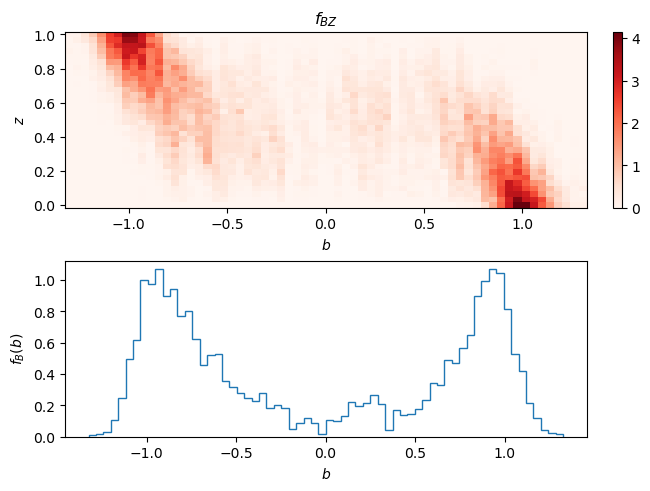

t = 0.900 



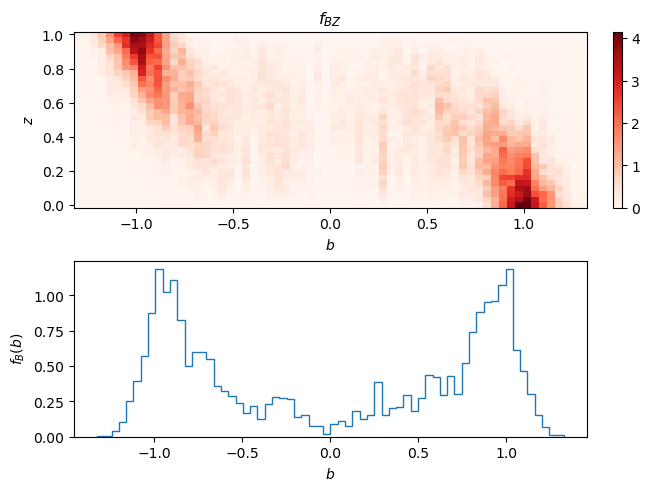

In [6]:
solver(X, N_b, N_z, γ_p, γ_m, t, Δt, z)